In [1]:
#  Copyright (c) 2022 Charlie Payne
#  Licence: GNU GPLv3

# https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
# https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

import pandas as pd
import numpy as np

In [2]:
# load in the data

data_dir = '../data/intermediates'
fname = 'feature_gen_cond1_pat59to74.csv'

X = pd.read_csv(data_dir + '/' + fname)
display(X)

,subject,FT8__variance_larger_than_standard_deviation,FT8__has_duplicate,FT8__sum_values,FT8__abs_energy,FT8__mean_abs_change,FT8__mean_change,FT8__mean_second_derivative_central,FT8__median,FT8__mean,...,F8__permutation_entropy__dimension_5__tau_1,F8__permutation_entropy__dimension_6__tau_1,F8__permutation_entropy__dimension_7__tau_1,"F8__matrix_profile__feature_""min""__threshold_0.98","F8__matrix_profile__feature_""max""__threshold_0.98","F8__matrix_profile__feature_""mean""__threshold_0.98","F8__matrix_profile__feature_""median""__threshold_0.98","F8__matrix_profile__feature_""25""__threshold_0.98","F8__matrix_profile__feature_""75""__threshold_0.98",F8__mean_n_absolute_max__number_of_maxima_7
0,59,1.0,1.0,777.7317,98656.067487,1.305147,-0.003403,-0.000240,0.30785,0.253168,...,3.993913,5.294469,6.464381,1.029810,4.434078,2.227396,2.192896,1.826445,2.585337,26.497043
1,60,1.0,1.0,6485.4195,336798.423372,1.571288,-0.000066,-0.000223,1.80115,2.111139,...,3.800936,4.998120,6.114985,1.248416,5.296701,2.791345,2.778914,2.258494,3.268137,37.659100
2,61,1.0,1.0,13719.2534,228306.968864,1.411770,-0.001351,-0.000153,3.91120,4.465903,...,3.903370,5.165796,6.325241,1.242382,5.568934,3.051836,2.997708,2.326901,3.728863,30.780414
3,62,1.0,1.0,-5344.4974,190614.997518,1.329999,0.001538,0.000546,-0.75150,-1.739745,...,3.900408,5.160001,6.306640,1.020475,4.777895,2.281135,2.226597,1.712609,2.790486,25.298500
4,63,1.0,1.0,56.9164,190871.962928,1.257999,0.000325,0.000233,-0.25290,0.018527,...,3.842990,5.076446,6.206395,1.076777,4.449286,2.372164,2.300161,1.923358,2.758542,29.850214
5,64,1.0,1.0,3804.7190,102603.799107,1.030478,0.003147,-0.000109,1.30140,1.238515,...,3.852363,5.102439,6.257359,1.074014,4.936062,2.487763,2.423259,2.001107,2.918794,20.424414
6,65,1.0,1.0,15141.6295,163409.020791,1.426824,0.003286,0.000039,5.06025,4.928916,...,3.852747,5.104715,6.249501,1.217404,4.602500,2.538173,2.511363,2.067567,2.952033,24.573371
7,66,1.0,1.0,15862.7352,514680.130878,2.367921,-0.004371,0.000550,5.18165,5.163651,...,3.693626,4.853427,5.931520,1.545171,7.212863,3.856888,3.748614,2.924132,4.745014,54.143229
8,67,1.0,1.0,22869.4525,356632.657299,1.012126,0.003235,0.000098,6.35695,7.444483,...,3.958194,5.254611,6.429445,1.098503,4.965416,2.860717,2.849205,2.292318,3.361777,29.742743
9,68,1.0,1.0,26759.4937,341447.935590,1.125531,0.000415,-0.000002,8.26030,8.710773,...,4.020198,5.320818,6.478488,1.014365,4.253296,2.303425,2.296343,1.902029,2.678004,34.170614


In [3]:
# create the response vector

response_HC = {str(val): 0 for val in range(59, 66+1)}  # 0 = HC = Healthy Control
response_SZ = {str(val): 1 for val in range(67, 74+1)}  # 1 = SZ = Schizophrenia

response_dict = dict(response_HC, **response_SZ)
display(response_dict)
y = pd.Series(response_dict.values(), name='class')
display(y)

{'59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 1,
 '68': 1,
 '69': 1,
 '70': 1,
 '71': 1,
 '72': 1,
 '73': 1,
 '74': 1}

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: class, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# split the data: training, testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(y_train)
print('\n---------------------------------\n')
display(X_test)
display(y_test)

,subject,FT8__variance_larger_than_standard_deviation,FT8__has_duplicate,FT8__sum_values,FT8__abs_energy,FT8__mean_abs_change,FT8__mean_change,FT8__mean_second_derivative_central,FT8__median,FT8__mean,...,F8__permutation_entropy__dimension_5__tau_1,F8__permutation_entropy__dimension_6__tau_1,F8__permutation_entropy__dimension_7__tau_1,"F8__matrix_profile__feature_""min""__threshold_0.98","F8__matrix_profile__feature_""max""__threshold_0.98","F8__matrix_profile__feature_""mean""__threshold_0.98","F8__matrix_profile__feature_""median""__threshold_0.98","F8__matrix_profile__feature_""25""__threshold_0.98","F8__matrix_profile__feature_""75""__threshold_0.98",F8__mean_n_absolute_max__number_of_maxima_7
13,72,1.0,1.0,14857.4262,546863.805723,1.818741,0.004211,0.000382,5.96590,4.836402,...,3.865394,5.084251,6.200175,1.744941,8.772023,4.498828,4.219767,3.324462,5.599423,37.182814
4,63,1.0,1.0,56.9164,190871.962928,1.257999,0.000325,0.000233,-0.25290,0.018527,...,3.842990,5.076446,6.206395,1.076777,4.449286,2.372164,2.300161,1.923358,2.758542,29.850214
2,61,1.0,1.0,13719.2534,228306.968864,1.411770,-0.001351,-0.000153,3.91120,4.465903,...,3.903370,5.165796,6.325241,1.242382,5.568934,3.051836,2.997708,2.326901,3.728863,30.780414
14,73,1.0,1.0,11647.5339,87395.457160,0.712401,-0.001043,-0.000147,3.90715,3.791515,...,4.127959,5.494254,6.692640,0.860068,3.629164,1.893956,1.866250,1.555772,2.194218,22.341614
10,69,1.0,1.0,-805.1178,186672.941270,1.333353,0.002321,-0.000305,0.18675,-0.262083,...,3.963876,5.211025,6.343954,1.523211,7.667985,4.044834,3.820754,3.071229,5.022338,23.435329
7,66,1.0,1.0,15862.7352,514680.130878,2.367921,-0.004371,0.000550,5.18165,5.163651,...,3.693626,4.853427,5.931520,1.545171,7.212863,3.856888,3.748614,2.924132,4.745014,54.143229
15,74,1.0,1.0,2297.4694,330105.286006,1.782882,-0.007788,0.000465,0.78570,0.747874,...,3.989071,5.297619,6.472123,1.137374,4.753586,2.751617,2.765593,2.234077,3.233378,35.549757
11,70,1.0,1.0,-14184.3130,300721.077709,1.236080,0.004277,-0.000326,-3.25385,-4.617289,...,3.968148,5.253679,6.423215,1.005543,3.885446,2.181743,2.158625,1.759296,2.551199,31.385886
3,62,1.0,1.0,-5344.4974,190614.997518,1.329999,0.001538,0.000546,-0.75150,-1.739745,...,3.900408,5.160001,6.306640,1.020475,4.777895,2.281135,2.226597,1.712609,2.790486,25.298500
0,59,1.0,1.0,777.7317,98656.067487,1.305147,-0.003403,-0.000240,0.30785,0.253168,...,3.993913,5.294469,6.464381,1.029810,4.434078,2.227396,2.192896,1.826445,2.585337,26.497043


13    1
4     0
2     0
14    1
10    1
7     0
15    1
11    1
3     0
0     0
5     0
12    1
Name: class, dtype: int64


---------------------------------



,subject,FT8__variance_larger_than_standard_deviation,FT8__has_duplicate,FT8__sum_values,FT8__abs_energy,FT8__mean_abs_change,FT8__mean_change,FT8__mean_second_derivative_central,FT8__median,FT8__mean,...,F8__permutation_entropy__dimension_5__tau_1,F8__permutation_entropy__dimension_6__tau_1,F8__permutation_entropy__dimension_7__tau_1,"F8__matrix_profile__feature_""min""__threshold_0.98","F8__matrix_profile__feature_""max""__threshold_0.98","F8__matrix_profile__feature_""mean""__threshold_0.98","F8__matrix_profile__feature_""median""__threshold_0.98","F8__matrix_profile__feature_""25""__threshold_0.98","F8__matrix_profile__feature_""75""__threshold_0.98",F8__mean_n_absolute_max__number_of_maxima_7
1,60,1.0,1.0,6485.4195,336798.423372,1.571288,-0.000066,-0.000223,1.80115,2.111139,...,3.800936,4.998120,6.114985,1.248416,5.296701,2.791345,2.778914,2.258494,3.268137,37.659100
6,65,1.0,1.0,15141.6295,163409.020791,1.426824,0.003286,0.000039,5.06025,4.928916,...,3.852747,5.104715,6.249501,1.217404,4.602500,2.538173,2.511363,2.067567,2.952033,24.573371
8,67,1.0,1.0,22869.4525,356632.657299,1.012126,0.003235,0.000098,6.35695,7.444483,...,3.958194,5.254611,6.429445,1.098503,4.965416,2.860717,2.849205,2.292318,3.361777,29.742743
9,68,1.0,1.0,26759.4937,341447.935590,1.125531,0.000415,-0.000002,8.26030,8.710773,...,4.020198,5.320818,6.478488,1.014365,4.253296,2.303425,2.296343,1.902029,2.678004,34.170614


1    0
6    0
8    1
9    1
Name: class, dtype: int64

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
# scale the data for optimized performance

sc = StandardScaler()  # scale via Z-score
X_train = sc.fit_transform(X_train)  # fit and transform the X_train data via Z-score
X_test = sc.transform(X_test)        # transform the X_test data using the mean and standard deviation fit from X_train

In [8]:
from sklearn.decomposition import PCA

In [9]:
# run PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
import matplotlib.pyplot as plt

array([1.83815173e-01, 1.32260014e-01, 1.06558092e-01, 9.60149840e-02,
       8.89707429e-02, 7.76379570e-02, 7.55017415e-02, 6.85575537e-02,
       6.20618863e-02, 5.62064281e-02, 5.24154270e-02, 5.54254346e-31])

12

Text(0.5, 1.0, 'explained variance')

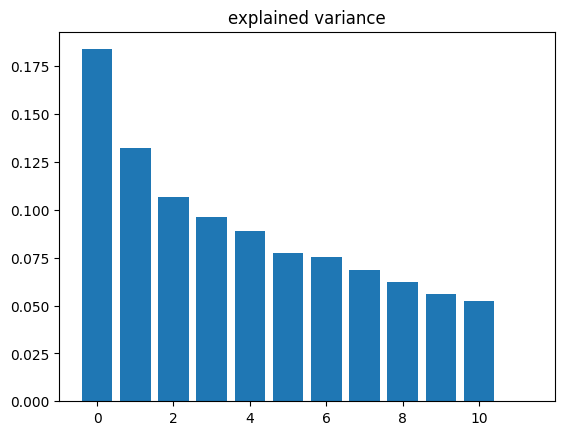

In [11]:
# plot the explained variance

explained_variance = pca.explained_variance_ratio_
display(explained_variance)
display(len(explained_variance))

plt.bar(range(0, len(explained_variance)), explained_variance)
plt.title('explained variance')

[0.18381517328085772,
 0.316075187691614,
 0.422633279584329,
 0.5186482635357286,
 0.6076190064397982,
 0.6852569634148288,
 0.7607587049617524,
 0.8293162586605616,
 0.891378144917166,
 0.9475845730071855,
 1.0,
 1.0]

Text(0.5, 1.0, 'cummulative explained variance')

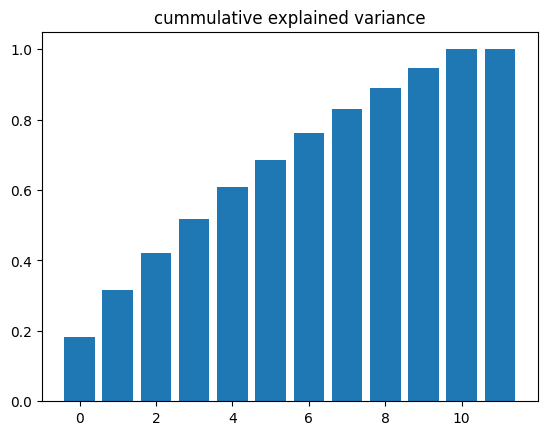

In [12]:
# plot the cummulative explained variance

sum = 0
cummulative_ev = []
for ii in range(len(explained_variance)):
    sum += explained_variance[ii]
    cummulative_ev.append(sum)
display(cummulative_ev)

plt.bar(range(0, len(cummulative_ev)), cummulative_ev)
plt.title('cummulative explained variance')

In [13]:
display(X_train)
display(X_train[1, 2])  # row = data point, column = principal component
display(X_train.shape)

array([[ 1.26038366e+02, -1.30725766e+02, -2.73001058e+01,
        -1.16883839e+02, -1.05172196e+02, -7.23624989e+01,
         1.72862881e+01,  1.12619350e+01,  8.71553197e+00,
         5.96931699e+00,  1.13779699e+01,  1.68997551e-13],
       [-1.38029173e+01,  1.07843832e+01, -5.45354842e+01,
        -6.10375153e+01,  2.33951736e+01,  1.35285269e+02,
         1.22382746e+02, -3.94904736e+00,  5.30123188e+01,
        -2.48361386e+01,  8.70088595e+00,  1.68997551e-13],
       [ 1.51512038e+01, -1.38371061e+01, -2.05430475e+00,
         1.25866766e+02, -1.32703675e+02,  7.74423838e+01,
        -5.74848313e+01,  5.61659434e+01,  2.97447879e+01,
        -1.26994445e+01, -2.98471492e+01,  1.68997551e-13],
       [-9.24726289e+01, -2.73071107e+01, -2.83091112e+01,
         6.69209706e+01, -9.03419732e+00, -3.31700262e+01,
         1.60009923e+01, -1.86518311e+01, -4.81285593e+01,
        -5.35007384e+01,  1.35192187e+02,  1.68997551e-13],
       [ 6.24685823e+01,  6.67977213e+01,  2.2815292

-54.53548422993512

(12, 12)

In [14]:
# split out training data into control and schizophrenia

X_HC = np.empty((0, X_train.shape[1]))
X_SZ = np.empty((0, X_train.shape[1]))

for ii in range(len(y_train)):
    if y_train.iloc[ii] == 0:
        print(f"HC: {ii}, {y_train.index[ii]}")
        X_HC = np.append(X_HC, [X_train[ii, :]], axis=0)
    elif y_train.iloc[ii] == 1:
        print(f"SZ: {ii}, {y_train.index[ii]}")
        X_SZ = np.append(X_SZ, [X_train[ii, :]], axis=0)

display(X_HC)
print('\n--------------------\n')
display(X_SZ)

SZ: 0, 13
HC: 1, 4
HC: 2, 2
SZ: 3, 14
SZ: 4, 10
HC: 5, 7
SZ: 6, 15
SZ: 7, 11
HC: 8, 3
HC: 9, 0
HC: 10, 5
SZ: 11, 12


array([[-1.38029173e+01,  1.07843832e+01, -5.45354842e+01,
        -6.10375153e+01,  2.33951736e+01,  1.35285269e+02,
         1.22382746e+02, -3.94904736e+00,  5.30123188e+01,
        -2.48361386e+01,  8.70088595e+00,  1.68997551e-13],
       [ 1.51512038e+01, -1.38371061e+01, -2.05430475e+00,
         1.25866766e+02, -1.32703675e+02,  7.74423838e+01,
        -5.74848313e+01,  5.61659434e+01,  2.97447879e+01,
        -1.26994445e+01, -2.98471492e+01,  1.68997551e-13],
       [ 1.81955580e+02,  1.85370468e+02, -9.07798229e+01,
         3.29001641e+01,  1.73671863e+01, -4.61813233e+01,
         9.40877716e+00, -1.44163993e+00, -1.65942127e+01,
         9.59674320e+00,  2.77031413e+00,  1.68997551e-13],
       [-4.36848176e+01,  2.82365252e+01, -2.26448786e+01,
        -9.46178685e+01, -7.42833583e+00,  7.86179918e+01,
        -1.12722148e+02, -6.80345748e+01, -9.00113242e+01,
         1.49156143e+01, -9.74558194e+00,  1.68997551e-13],
       [-8.93210310e+01, -1.62365227e+01,  1.4161353


--------------------



array([[ 1.26038366e+02, -1.30725766e+02, -2.73001058e+01,
        -1.16883839e+02, -1.05172196e+02, -7.23624989e+01,
         1.72862881e+01,  1.12619350e+01,  8.71553197e+00,
         5.96931699e+00,  1.13779699e+01,  1.68997551e-13],
       [-9.24726289e+01, -2.73071107e+01, -2.83091112e+01,
         6.69209706e+01, -9.03419732e+00, -3.31700262e+01,
         1.60009923e+01, -1.86518311e+01, -4.81285593e+01,
        -5.35007384e+01,  1.35192187e+02,  1.68997551e-13],
       [ 6.24685823e+01,  6.67977213e+01,  2.28152928e+02,
        -2.36205913e+01, -5.71329532e-01,  7.15934577e+00,
         1.46340159e+01, -3.06769740e+00,  4.49726264e+00,
        -1.23051716e+01,  2.38847029e+01,  1.68997551e-13],
       [ 1.26508777e+02, -1.46767638e+02,  3.13976905e+00,
         6.40176657e+01,  1.46202163e+02,  2.49138919e+01,
        -4.07854514e+01, -6.29899045e-01,  3.68938593e+00,
         1.33325812e+01, -4.83067729e+00,  1.68997551e-13],
       [-9.38149671e+01,  2.60686015e+01, -1.2692730

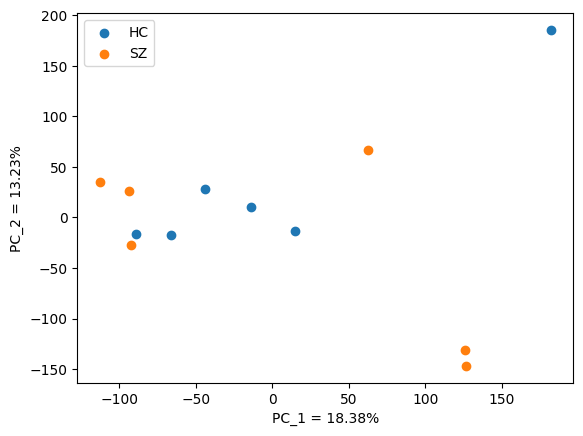

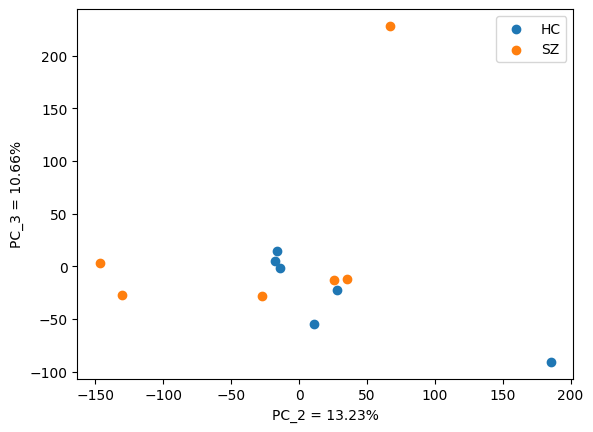

In [15]:
# plot PC_1 vs PC_2 then PC_2 vs PC_3

fig1 = plt.figure(1)
plt.scatter(X_HC[:, 0], X_HC[:, 1], label='HC')
plt.scatter(X_SZ[:, 0], X_SZ[:, 1], label='SZ')
plt.legend()
plt.xlabel(f"PC_1 = {100*explained_variance[0]:.2f}%")
plt.ylabel(f"PC_2 = {100*explained_variance[1]:.2f}%")
# plt.title(f"PCA_1 vs PCA_2, CEV = {100*cummulative_ev[1]:.2f}%")

fig2 = plt.figure(2)
plt.scatter(X_HC[:, 1], X_HC[:, 2], label='HC')
plt.scatter(X_SZ[:, 1], X_SZ[:, 2], label='SZ')
plt.xlabel(f"PC_2 = {100*explained_variance[1]:.2f}%")
plt.ylabel(f"PC_3 = {100*explained_variance[2]:.2f}%")
plt.legend()
# plt.title(f"PCA_2 vs PCA_3, CEV = {100*cummulative_ev[2]:.2f}%")

In [ ]:
 # F- I-- N---